Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
data = boston.data
X = pd.DataFrame(data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['price'])

In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
X_train_scaled = scaler.fit_transform(X_train) # Насколько понял из хелпа - fit transform делает сразу два дела. Скейлит данные и тренирует scaler. Не очень очевидно просто
X_test_scaled = scaler.transform(X_test)

In [45]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=boston.feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=boston.feature_names)

In [46]:
from sklearn.manifold import TSNE

In [144]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [145]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [146]:
X_train_tsne

array([[ 17.645624  ,  28.406218  ],
       [  1.6133794 , -11.563689  ],
       [-14.5985    , -16.157717  ],
       [ 27.65398   ,  24.220755  ],
       [  3.8739002 ,  -9.40449   ],
       [ -2.0326433 , -15.587415  ],
       [ -0.48839292, -14.178003  ],
       [-23.318121  , -13.778156  ],
       [ 27.593517  ,  25.564125  ],
       [ 24.52684   ,  24.971394  ],
       [ -0.4837361 , -14.802191  ],
       [ -4.706522  ,  -6.1135483 ],
       [ -7.6053567 ,  -2.4791708 ],
       [ 25.225407  ,  24.14793   ],
       [ -9.633202  ,  -3.0656078 ],
       [  9.137457  ,  -6.7359676 ],
       [  2.062477  ,  -6.3994236 ],
       [-15.625919  , -16.7226    ],
       [-10.261498  , -14.384683  ],
       [-10.831577  , -18.551825  ],
       [ 23.060835  ,  28.409035  ],
       [  0.7136497 ,  -3.6644816 ],
       [ -3.6749017 , -16.457159  ],
       [ -0.679544  , -11.812288  ],
       [-23.207016  , -14.088349  ],
       [ -6.919917  ,  -2.852082  ],
       [  0.6825832 ,  11.351543  ],
 

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline

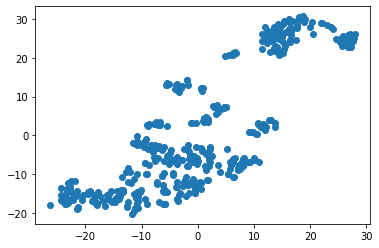

In [148]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.draw()

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [52]:
from sklearn.cluster import KMeans

In [149]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [224]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [225]:
labels_train

array([1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2,
       0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0,
       1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2,

In [152]:
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

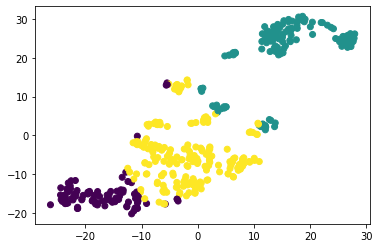

In [153]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=labels_train)
plt.draw()

Вот непонятно - почему KMeans относит некоторые точки к другим кластерам - нежели tsnе их располагает...
Получается - эти две модели по-разному как-то работают? Или порядок выборки не может не совпадать? (хотя это врядли наверное..)

Средние значения по кластерам: я могу аггрегировать значения по кластеру - но для этого мне нужно 
объединить array кластеров с интересующими меня данными. скажем ценами. цены в датафрейме y_train имеют разреженный индекс (поскольку это выборка из общих данных - туда попали 80% записей). А массив принадлежности к 
кластеру не имеет отдельного индекса и (как я полагаю и надеюсь) отсортирован по исходному индексу X_train_scaled.. (который в момент скейлинга признаков получил новый непрерывный индекс)

Соответственно - как мне сопоставить сортированный массив принадлежности к кластеру и несортированную цену из y_train? Сделать новый индекс для y_train по возрастанию старого?

Пробовал сортировать по индексу y_train, затем reset_index - и объединять с кластерами - но нет уверенности что это хорошая идея...

На просторах интернета нашел вот такой вариант: (пришлось правда поставить модуль sklearn-pandas)

In [203]:
from sklearn_pandas import DataFrameMapper

In [204]:
mapper = DataFrameMapper([(X_train.columns, StandardScaler())])

In [212]:
scaled_features = mapper.fit_transform(X_train.copy())

In [213]:
scaled_features

array([[ 1.28770177, -0.50032012,  1.03323679, ...,  0.84534281,
        -0.07433689,  1.75350503],
       [-0.33638447, -0.50032012, -0.41315956, ...,  1.20474139,
         0.4301838 , -0.5614742 ],
       [-0.40325332,  1.01327135, -0.71521823, ..., -0.63717631,
         0.06529747, -0.65159505],
       ...,
       [-0.40547014,  2.95931752, -1.30336132, ..., -0.59225149,
         0.37901005, -0.91069248],
       [ 0.85189733, -0.50032012,  1.03323679, ...,  0.84534281,
        -2.69458597,  1.52257036],
       [-0.38135592, -0.50032012, -0.35216694, ...,  1.15981657,
        -3.12158061, -0.25731635]])

In [214]:
scaled_features_df = pd.DataFrame(scaled_features, index=X_train.index, columns=X_train.columns)

In [216]:
scaled_features_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
15,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
332,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
423,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
19,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


Вот это похоже на исходный индекс

In [219]:
sorted_scaled_features_df = scaled_features_df.sort_index()
sorted_scaled_features_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
1,-0.404083,-0.500320,-0.568546,-0.278089,-0.744174,0.148339,0.369938,0.544448,-0.857485,-0.976292,-0.232853,0.444180,-0.467129
3,-0.403512,-0.500320,-1.278674,-0.278089,-0.837744,0.962651,-0.813885,1.058921,-0.740922,-1.096798,0.171470,0.419359,-1.340175
4,-0.399374,-0.500320,-1.278674,-0.278089,-0.837744,1.172933,-0.513459,1.058921,-0.740922,-1.096798,0.171470,0.444180,-1.003630
5,-0.403796,-0.500320,-1.278674,-0.278089,-0.837744,0.161040,-0.352516,1.058921,-0.740922,-1.096798,0.171470,0.413782,-1.020527
6,-0.397203,0.040248,-0.452369,-0.278089,-0.276323,-0.428877,-0.069972,0.823224,-0.507797,-0.560547,-1.400898,0.429965,-0.003851


Заново получаем TSNE

In [220]:
X_train_tsne_w_index = tsne.fit_transform(sorted_scaled_features_df)

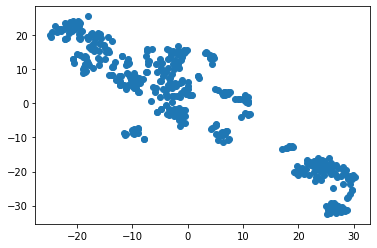

In [221]:
plt.scatter(X_train_tsne_w_index[:, 0], X_train_tsne_w_index[:, 1])
plt.draw()

Несколько другая картина получилась надо сказать...

In [226]:
labels_train_w_index = kmeans.fit_predict(sorted_scaled_features_df)

In [227]:
labels_train_w_index

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [229]:
pd.value_counts(labels_train_w_index)

1    190
0    128
2     86
dtype: int64

Распределение по кластерам изменилось не сильно вроде ))

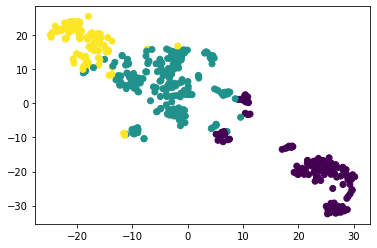

In [231]:
plt.scatter(X_train_tsne_w_index[:,0], X_train_tsne_w_index[:,1], c=labels_train_w_index)
plt.draw()

Ну вобщем картина та же.. даже вылетевшие точки

Зато я так понимаю теперь мы можем корректно объединять это с проиндексированными таким-же образом Y_train скажем..

Сортируем Y_train (массив labels_train_w_index отсортирован же)

In [235]:
y_train.sort_index().head()

,price
1,21.6
3,33.4
4,36.2
5,28.7
6,22.9


Объединяем с массивом кластеров

In [253]:
price_with_class = y_train.sort_index().reset_index().join(
    pd.DataFrame(labels_train_w_index, columns=['class'])).drop(['index'], axis=1)
price_with_class

,price,class
0,21.6,1
1,33.4,1
2,36.2,1
3,28.7,1
4,22.9,1
5,27.1,1
6,16.5,1
7,15.0,1
8,21.7,1
9,20.4,1


Вот не знаю.. мне почему-то казалось, что примерно эквивалентные цены должны попадать в примерно один кластер... Ну по принципу схожести большинства признаков. Но такой картины не наблюдается совершенно. Либо мы не совпали опять с индексацией...

In [254]:
price_with_class.groupby('class').mean()

,price
class,
0,16.179688
1,24.994737
2,27.788372


Хотя средняя цена по кластерам выглядит вроде осмысленной..

Теперь с CRIM то-же самое..

In [266]:
crim_w_class = pd.concat(
    [X_train.sort_index().reset_index()['CRIM'], pd.Series(labels_train_w_index, name='class')], axis=1)
crim_w_class

,CRIM,class
0,0.02731,1
1,0.03237,1
2,0.06905,1
3,0.02985,1
4,0.08829,1
5,0.14455,1
6,0.21124,1
7,0.22489,1
8,0.09378,1
9,0.62976,1


In [268]:
crim_w_class.groupby('class').mean()

,CRIM
class,
0,10.715219
1,0.422167
2,0.073566


Получается как-то так...

Возможно перемудрил с индексами и можно было просто брать кластера и считать что они сортированы по возрастанию индексов исходных данных.. Но этого я не знаю наверняка.